<a href="https://colab.research.google.com/github/droblesss/python/blob/main/TwitchGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
# Objetivos del ejercicio
# 1- Descubrir cuál es el mes del año en el que más horas de streaming consumen los usuarios de twitch, sacnado una media de cuantas horas mira cada usuario por mes 
# 2- Formatear la tabla para conseguir una columna de fechas adecuadamente. Con este fin he casteado a str las columnas month y day incluidas en la tabla, para posteriortmente concatenarlas con la columna Day creada manualmente 
# 3- Listar los juegos que más horas se han seguido por la plataforma desde 2016, en este caso League of Legends es el claro vencedor, el juego que ha hecho de los esports algo serio y grande le debe mucho a twitch
# 4- Observar el crecimiento de las horas consumidas en los últimos 5 años. Como se puede observar en la gráfica, el 2020 fue un impulso exponencial para la plataforma, aumentando las horas reproducidas, usuarios y streamers, seguramente haya una relación directa con las restricciones derivadas por el coronavirus.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

twitch = pd.read_csv("Twitch_game_data.csv", sep = ',', encoding='cp1252')



In [195]:
twitch

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753 hours,24951,99,3537,849,29,29.00
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641 hours,26559,654,25366,837,300,2.78
14397,198,Noita,12,2021,620983,13935 hours,27826,41,1961,835,18,44.56
14398,199,Pro Soccer Online,12,2021,619859,606 hours,36182,20,84,834,0,1022.87


In [196]:
twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [197]:
twitch["DAY"] = "01"
twitch


,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,DAY
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29,01
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62,01
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26,01
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29,01
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753 hours,24951,99,3537,849,29,29.00,01
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641 hours,26559,654,25366,837,300,2.78,01
14397,198,Noita,12,2021,620983,13935 hours,27826,41,1961,835,18,44.56,01
14398,199,Pro Soccer Online,12,2021,619859,606 hours,36182,20,84,834,0,1022.87,01


In [198]:
most_watched_game=twitch.groupby(by = "Game").sum()
most_watched_game.sort_values(by='Hours_watched', ascending=False)


,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
Game,,,,,,,,,,
League of Legends,129,468,145332,7450882313,46430370,342854,12333300,10215661,203546,3933.89
Just Chatting,111,276,80792,5917699588,24202611,203307,10885779,8105779,109933,2917.45
Fortnite,252,369,109038,4527130088,33390596,1480453,31562382,6200735,412309,851.90
Grand Theft Auto V,782,468,145332,3583159500,14501743,175774,6575088,4908979,84946,3244.80
Counter-Strike: Global Offensive,407,468,145332,3287101217,33899700,180177,8694567,4510643,90365,3698.35
...,...,...,...,...,...,...,...,...,...,...
Goat Simulator,192,6,2016,95776,1656,154,7582,133,15,8.68
Cards Against Humanity,195,5,2016,95184,11636,21,1125,128,3,39.54
Hitman: Blood Money,199,3,2016,93954,19504,8,260,126,1,109.25


In [199]:
twitch[['Month', 'Year']].astype(str)

,Month,Year
0,1,2016
1,1,2016
2,1,2016
3,1,2016
4,1,2016
...,...,...
14395,12,2021
14396,12,2021
14397,12,2021
14398,12,2021


In [200]:
twitch['DATE'] = twitch.Month.astype(str)+ "/" + twitch.DAY.astype(str) + "/"+ twitch.Year.astype(str)
twitch

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,DAY,DATE
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29,01,1/01/2016
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62,01,1/01/2016
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26,01,1/01/2016
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29,01,1/01/2016
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03,01,1/01/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753 hours,24951,99,3537,849,29,29.00,01,12/01/2021
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641 hours,26559,654,25366,837,300,2.78,01,12/01/2021
14397,198,Noita,12,2021,620983,13935 hours,27826,41,1961,835,18,44.56,01,12/01/2021
14398,199,Pro Soccer Online,12,2021,619859,606 hours,36182,20,84,834,0,1022.87,01,12/01/2021


In [201]:
twitch['DATE'] = pd.to_datetime(twitch['DATE'])
twitch

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,DAY,DATE
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29,01,2016-01-01
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62,01,2016-01-01
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26,01,2016-01-01
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29,01,2016-01-01
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03,01,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753 hours,24951,99,3537,849,29,29.00,01,2021-12-01
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641 hours,26559,654,25366,837,300,2.78,01,2021-12-01
14397,198,Noita,12,2021,620983,13935 hours,27826,41,1961,835,18,44.56,01,2021-12-01
14398,199,Pro Soccer Online,12,2021,619859,606 hours,36182,20,84,834,0,1022.87,01,2021-12-01


In [202]:
#twitch.resample('M')
mes = twitch.groupby(twitch['DATE'].dt.month).sum()
mes = mes.sort_values('Hours_watched', ascending=False)
mes['Daily_Hours_AVG'] = mes.Hours_watched / mes.Avg_viewers
mes



,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Daily_Hours_AVG
DATE,,,,,,,,,,,
5,120600,6000,2422200,6175841941,61160344,710785,21690964,8311423,271273,74719.97,743.054702
4,120600,4800,2422200,6133830011,59784763,719935,20995716,8530457,272384,74288.63,719.050575
10,120600,12000,2422200,6045582437,67022861,712513,20620013,8136120,252353,80781.40,743.054728
12,120600,14400,2422200,5968487866,68404783,899179,20714901,8032367,269233,69156.31,743.054677
8,120600,9600,2422200,5855564845,69815985,708972,21326665,7880377,261396,74841.63,743.056436
11,120600,13200,2422200,5836716974,70366540,752057,20478363,8117228,259418,100399.61,719.052979
6,120600,7200,2422200,5724631006,73604950,734646,20289494,7961334,256146,85651.47,719.054245
7,120600,8400,2422200,5668884056,71851921,597656,20739170,7629118,258680,172115.34,743.058904
3,120600,3600,2422200,5575652878,54992459,620837,21047314,7503649,252022,70634.16,743.058861


In [203]:
twitch

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,DAY,DATE
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29,01,2016-01-01
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62,01,2016-01-01
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26,01,2016-01-01
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29,01,2016-01-01
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03,01,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753 hours,24951,99,3537,849,29,29.00,01,2021-12-01
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641 hours,26559,654,25366,837,300,2.78,01,2021-12-01
14397,198,Noita,12,2021,620983,13935 hours,27826,41,1961,835,18,44.56,01,2021-12-01
14398,199,Pro Soccer Online,12,2021,619859,606 hours,36182,20,84,834,0,1022.87,01,2021-12-01


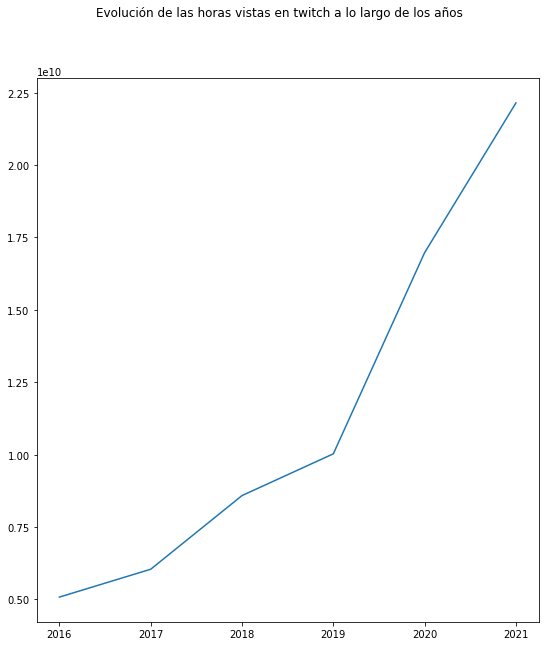

In [206]:
year_growth = twitch.groupby(twitch['DATE'].dt.year).sum()
year_growth
plt.figure(figsize=(9, 10))
years = ['2016', '2017', '2018', '2019', '2020', '2021']
#plt.bar(years, year_growth.Hours_watched)
plt.plot(years, year_growth.Hours_watched)
#plt.subplot(year_growth.Hours_watched.astype(int) + 1000)
plt.suptitle('Evolución de las horas vistas en twitch a lo largo de los años')
plt.show()
plt.show()
